In [1]:
import torch


attn_per_seq_length = torch.load(
  "attns_per_sequence_length.pth",
  weights_only=False,
  map_location="cpu"
)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_attn_output(attn_output, layer_idx: int, max_sequence_length, bins=128, y_max=None):
    # attn_output: [num_heads, num_tokens, model_dim]
    num_heads = attn_output.shape[0]
    
    # Create 8 rows and 4 columns for 32 heads
    fig, axes = plt.subplots(8, 4, figsize=(24, 40))  # Increased height for better visibility
    axes = axes.flatten()

    # Plot histogram for each head
    for head in range(num_heads):
        outputs = attn_output[head].flatten().detach().cpu().numpy()
        
        sns.histplot(
            outputs,
            kde=False,
            ax=axes[head],
            bins=bins,
            color='blue',
            legend=False
        )
        axes[head].set_title(f'Layer #{layer_idx}, Head #{head + 1}')
        axes[head].set_xlabel('Value')
        axes[head].set_ylabel('Frequency')
        if y_max:
            axes[head].set_ylim(0, y_max)

    # Set main title
    fig.suptitle(
        f'Attention Output Distributions - Sequence Length {max_sequence_length}',
        fontsize=16,
        y=1.02
    )

    plt.tight_layout()
    plt.show()

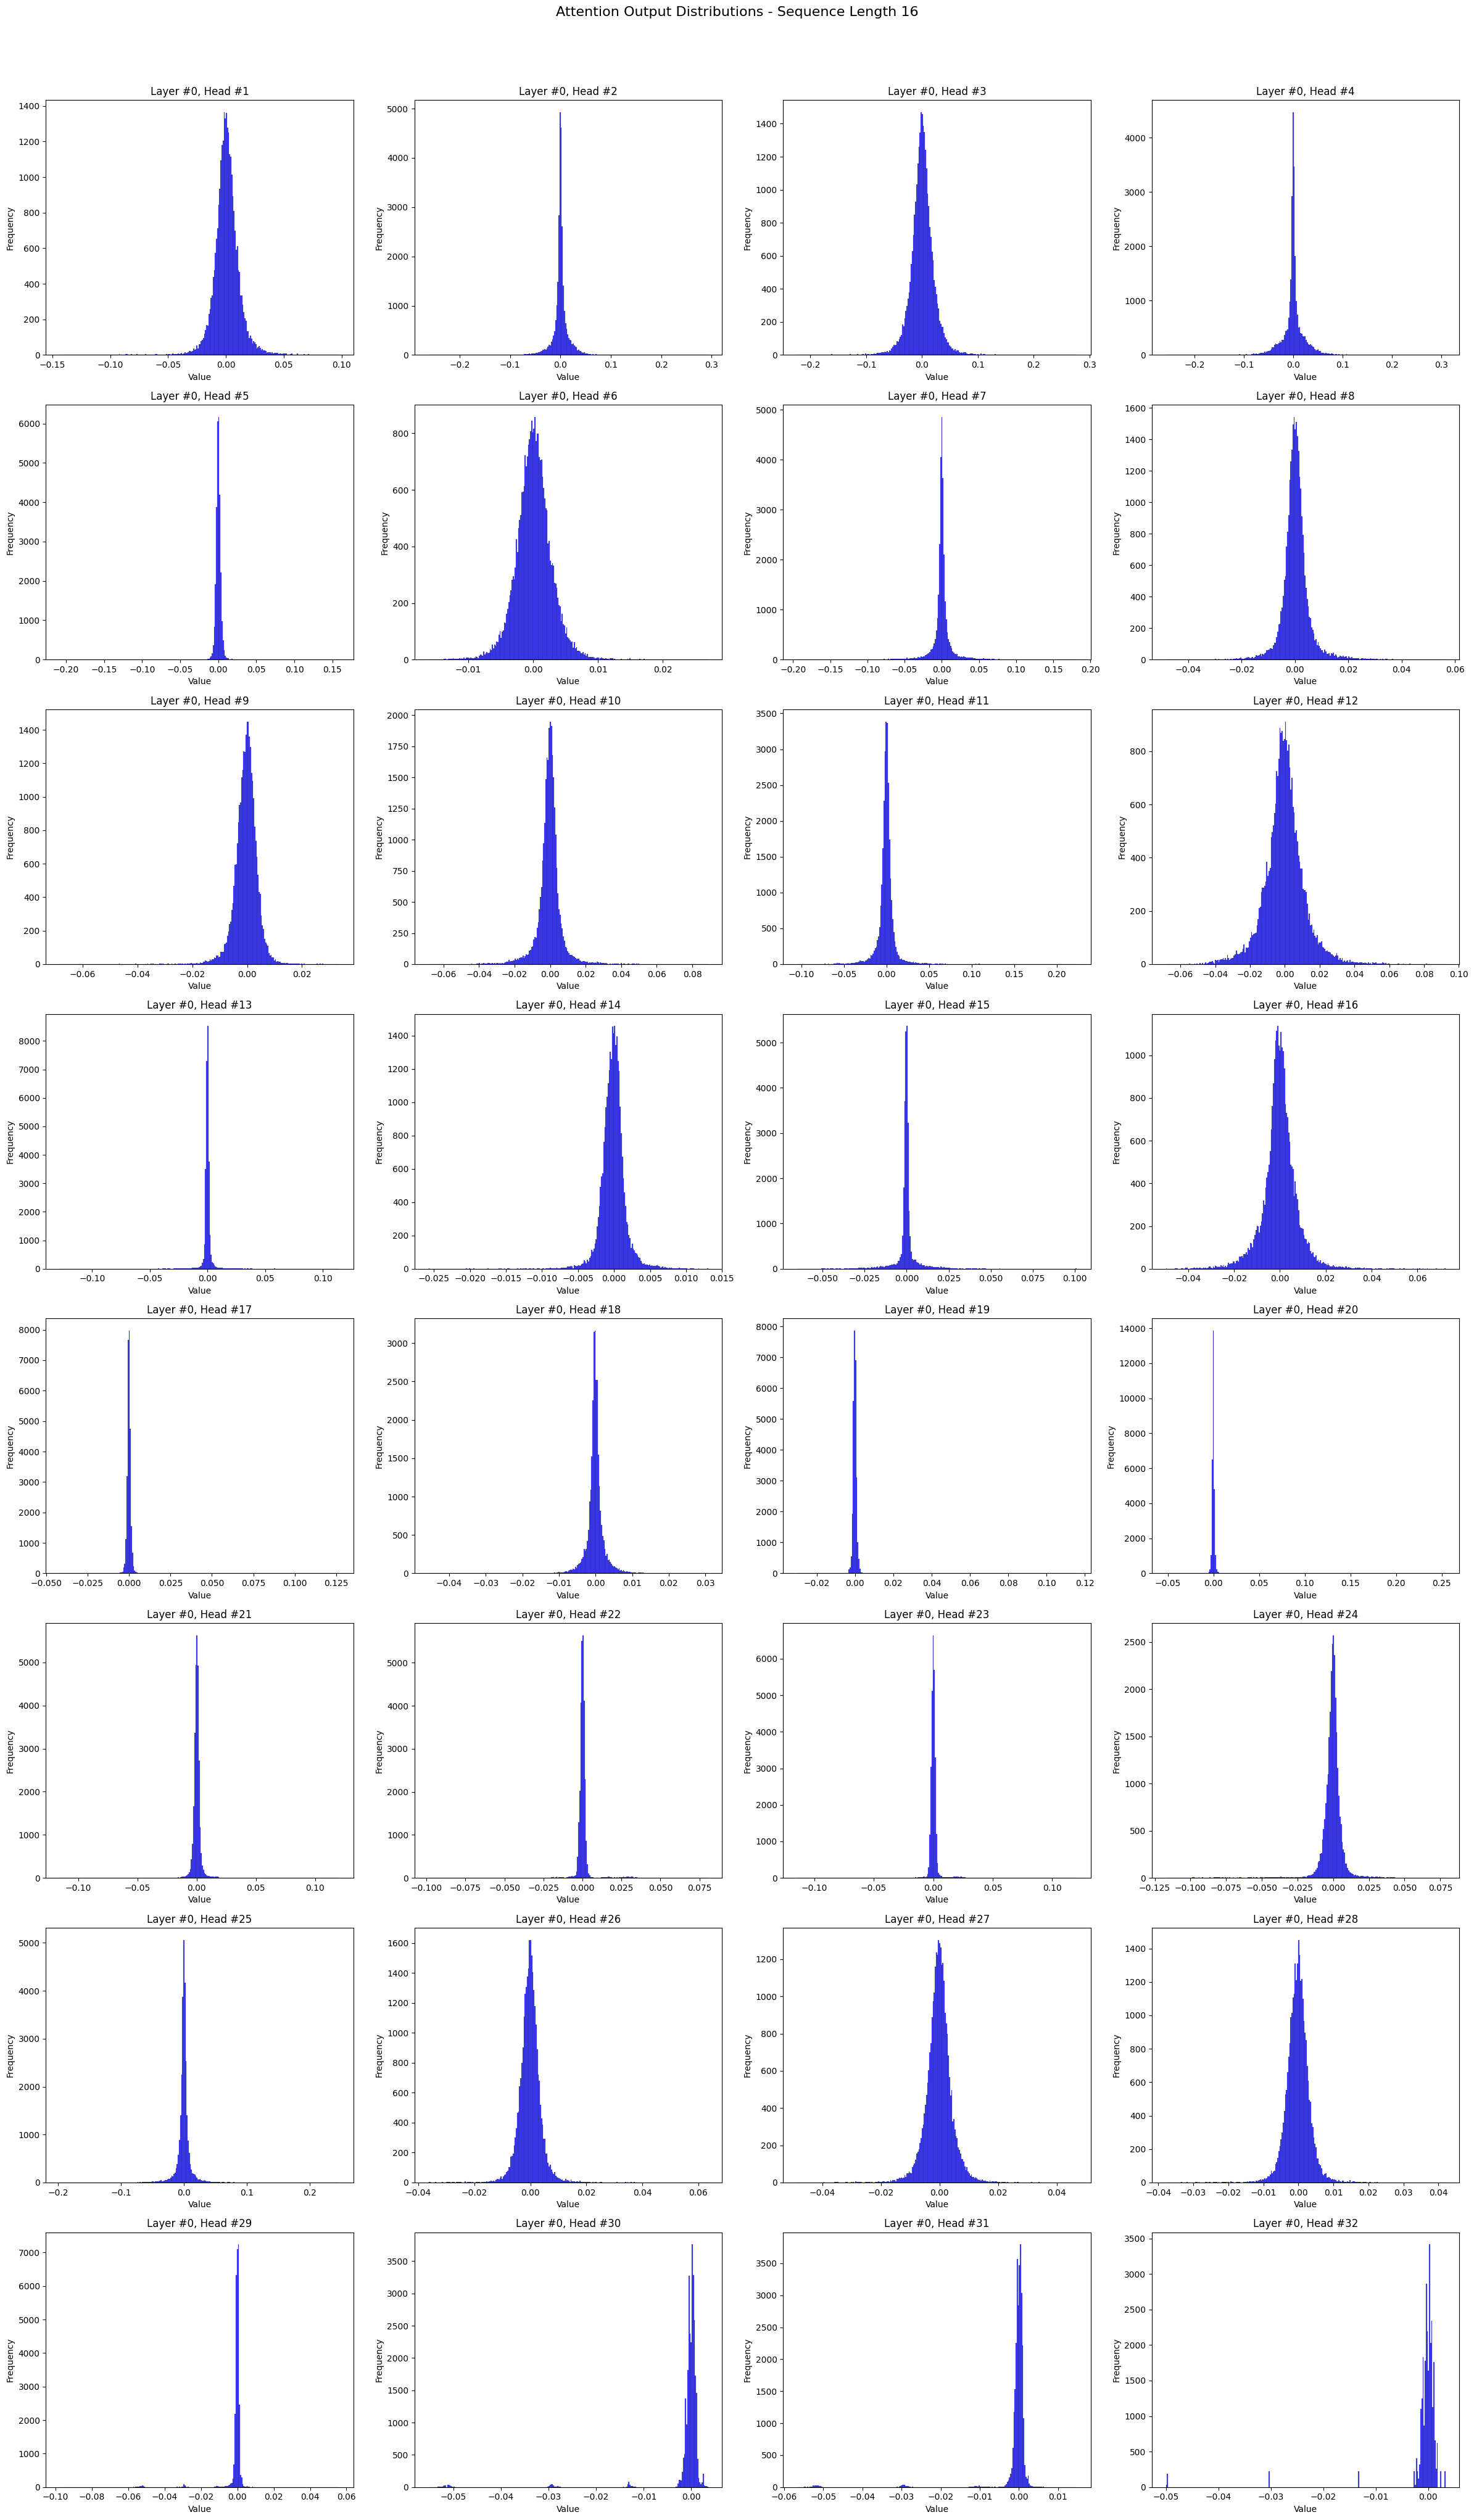

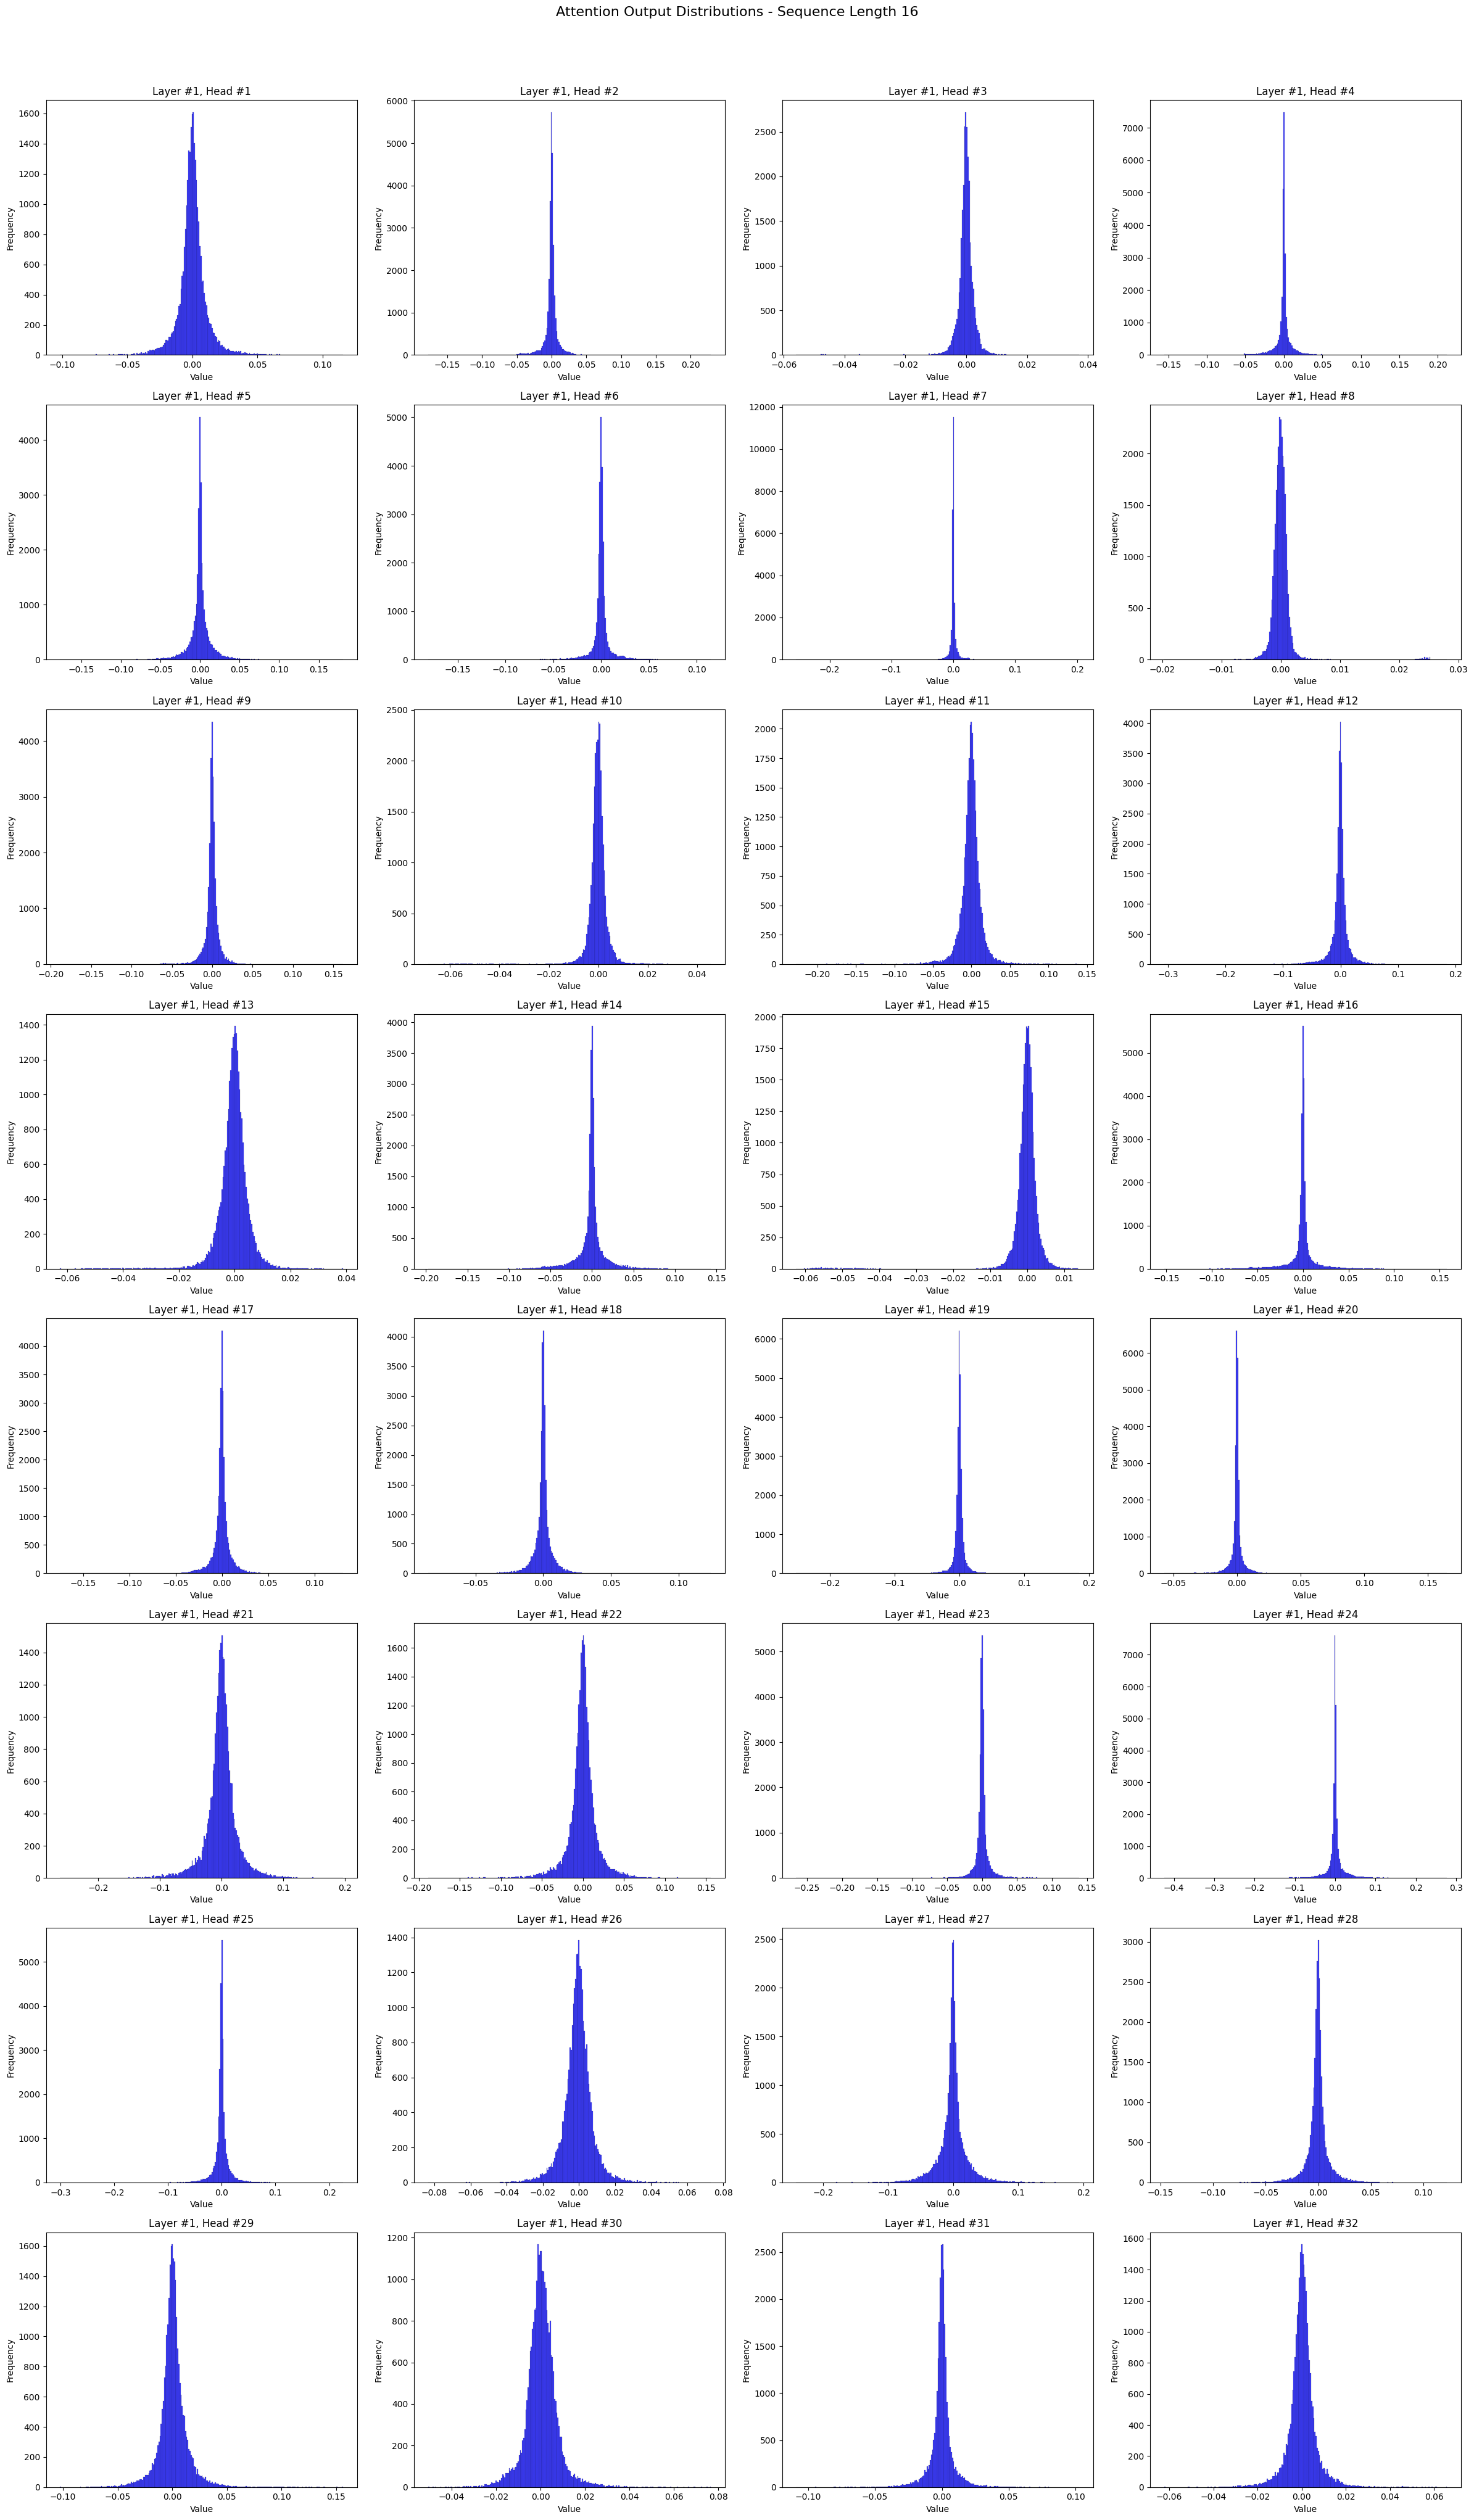

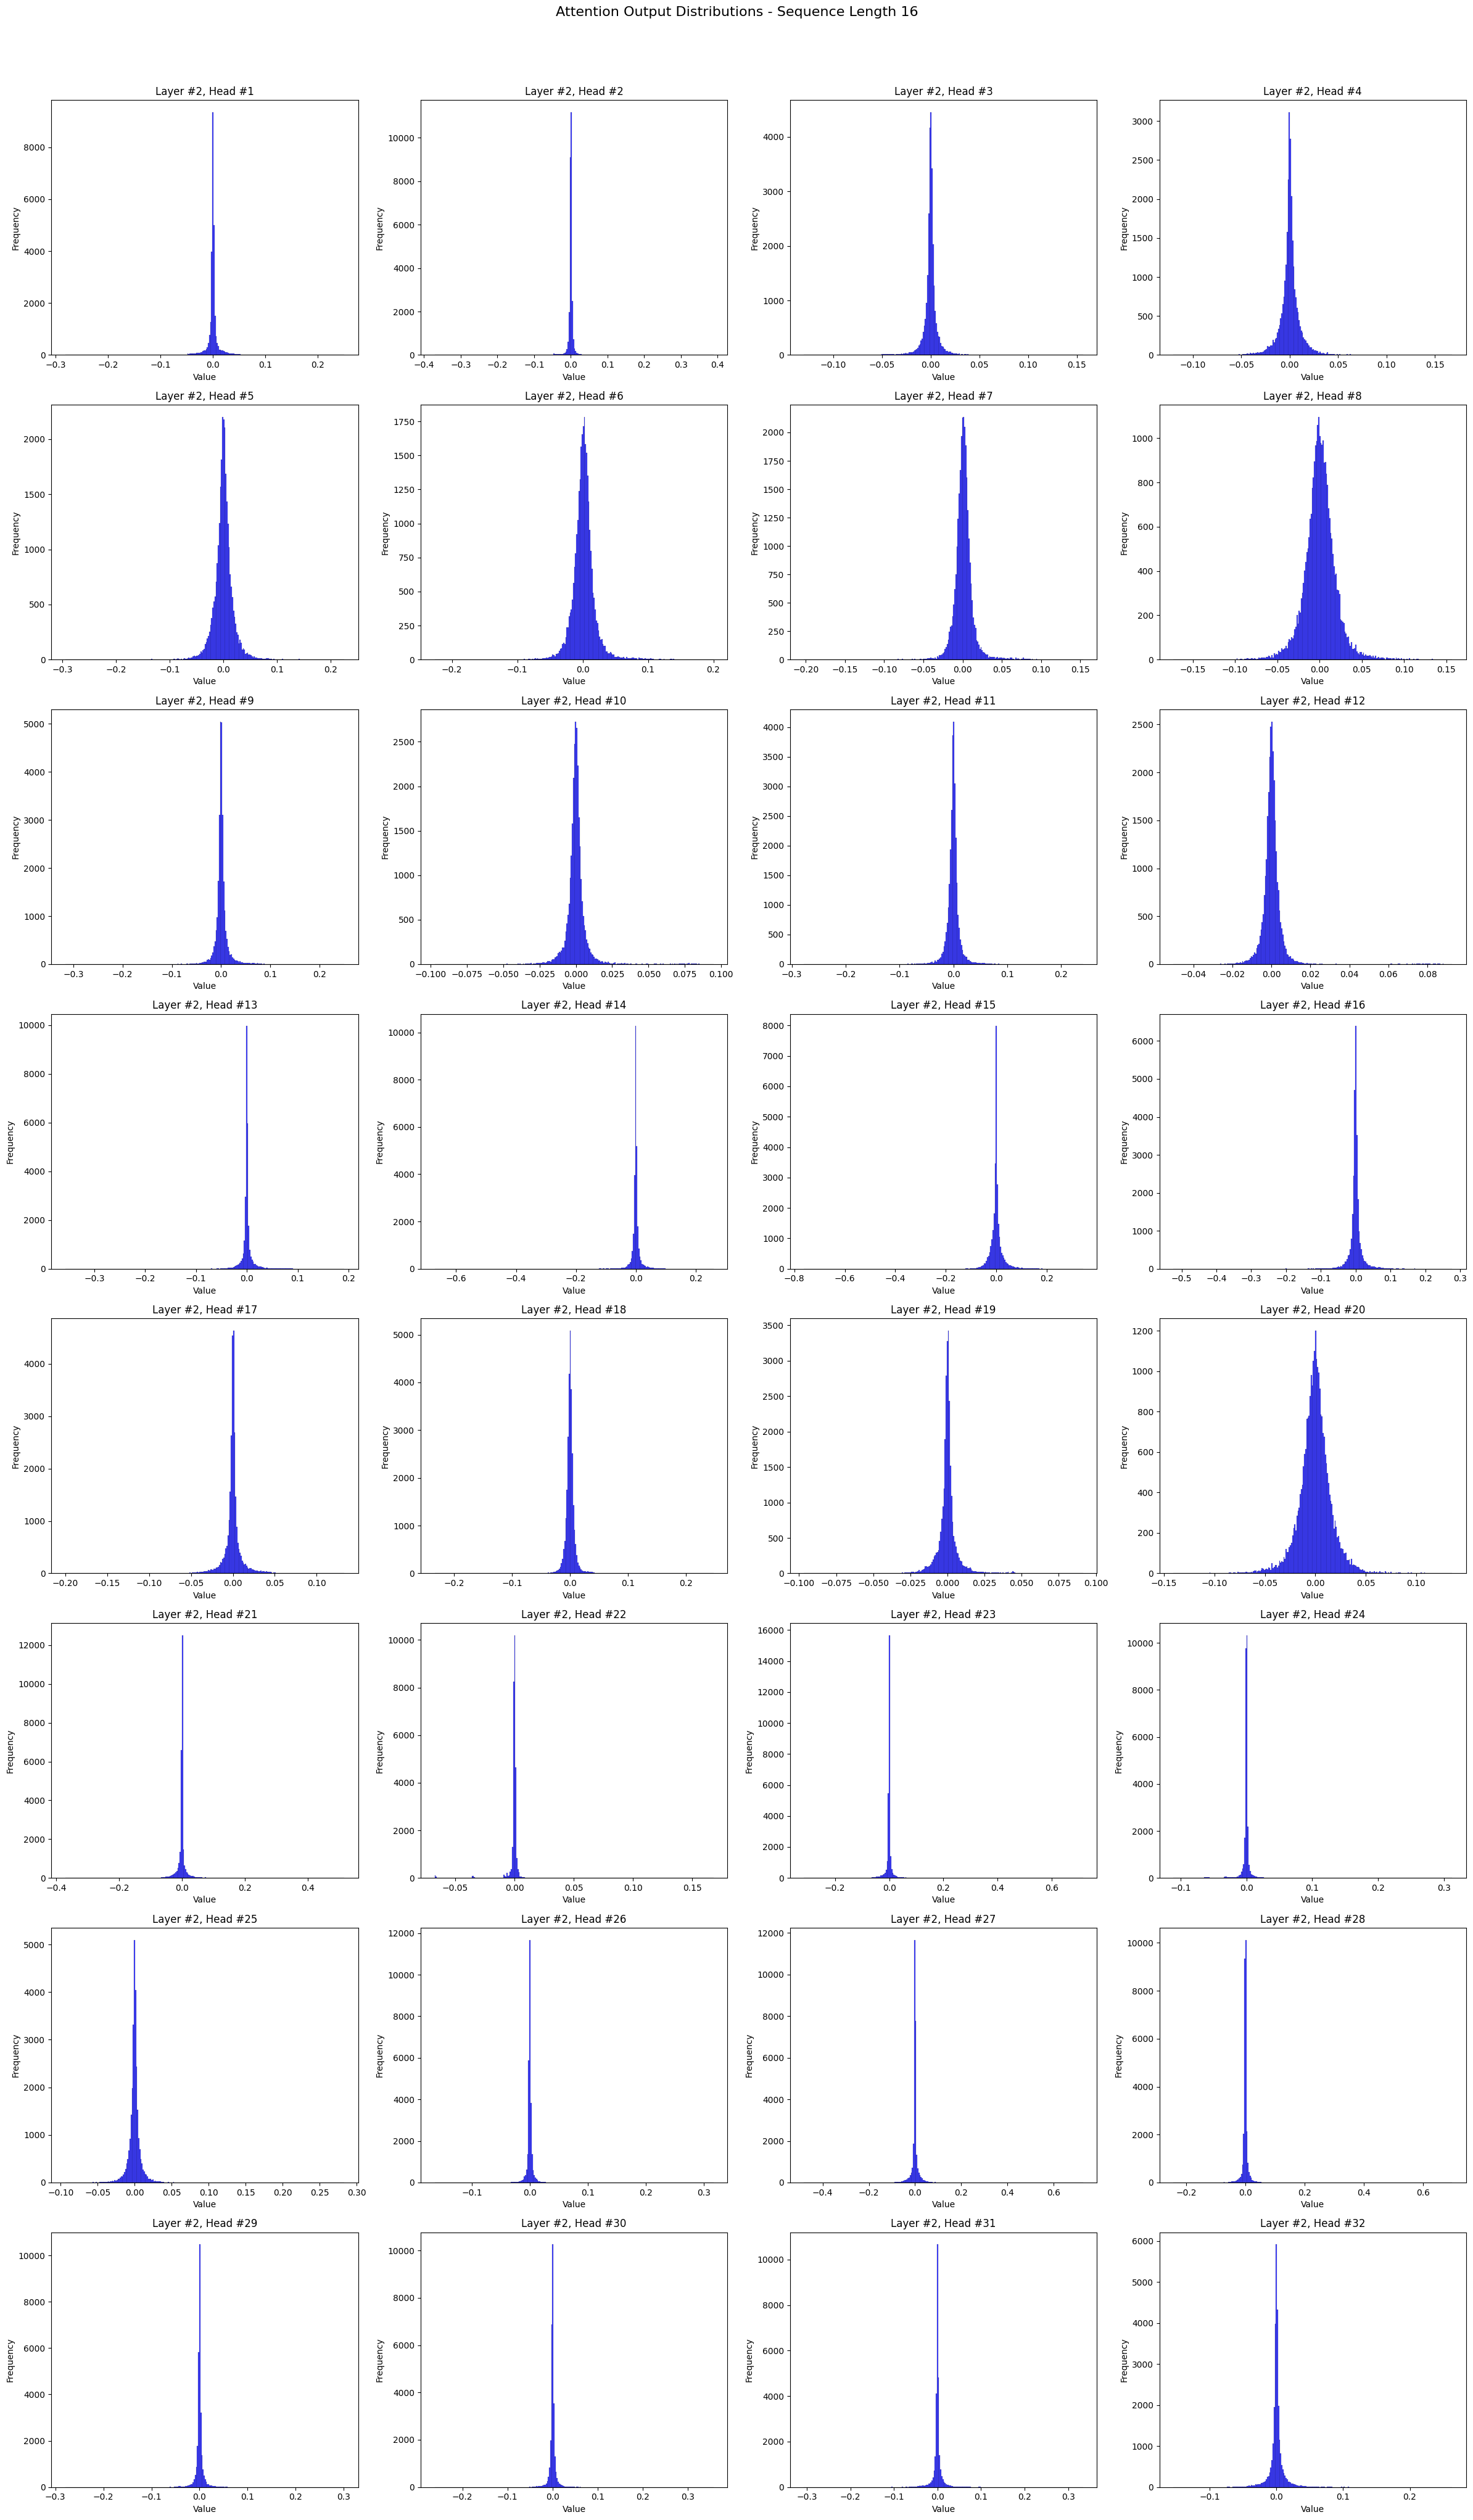

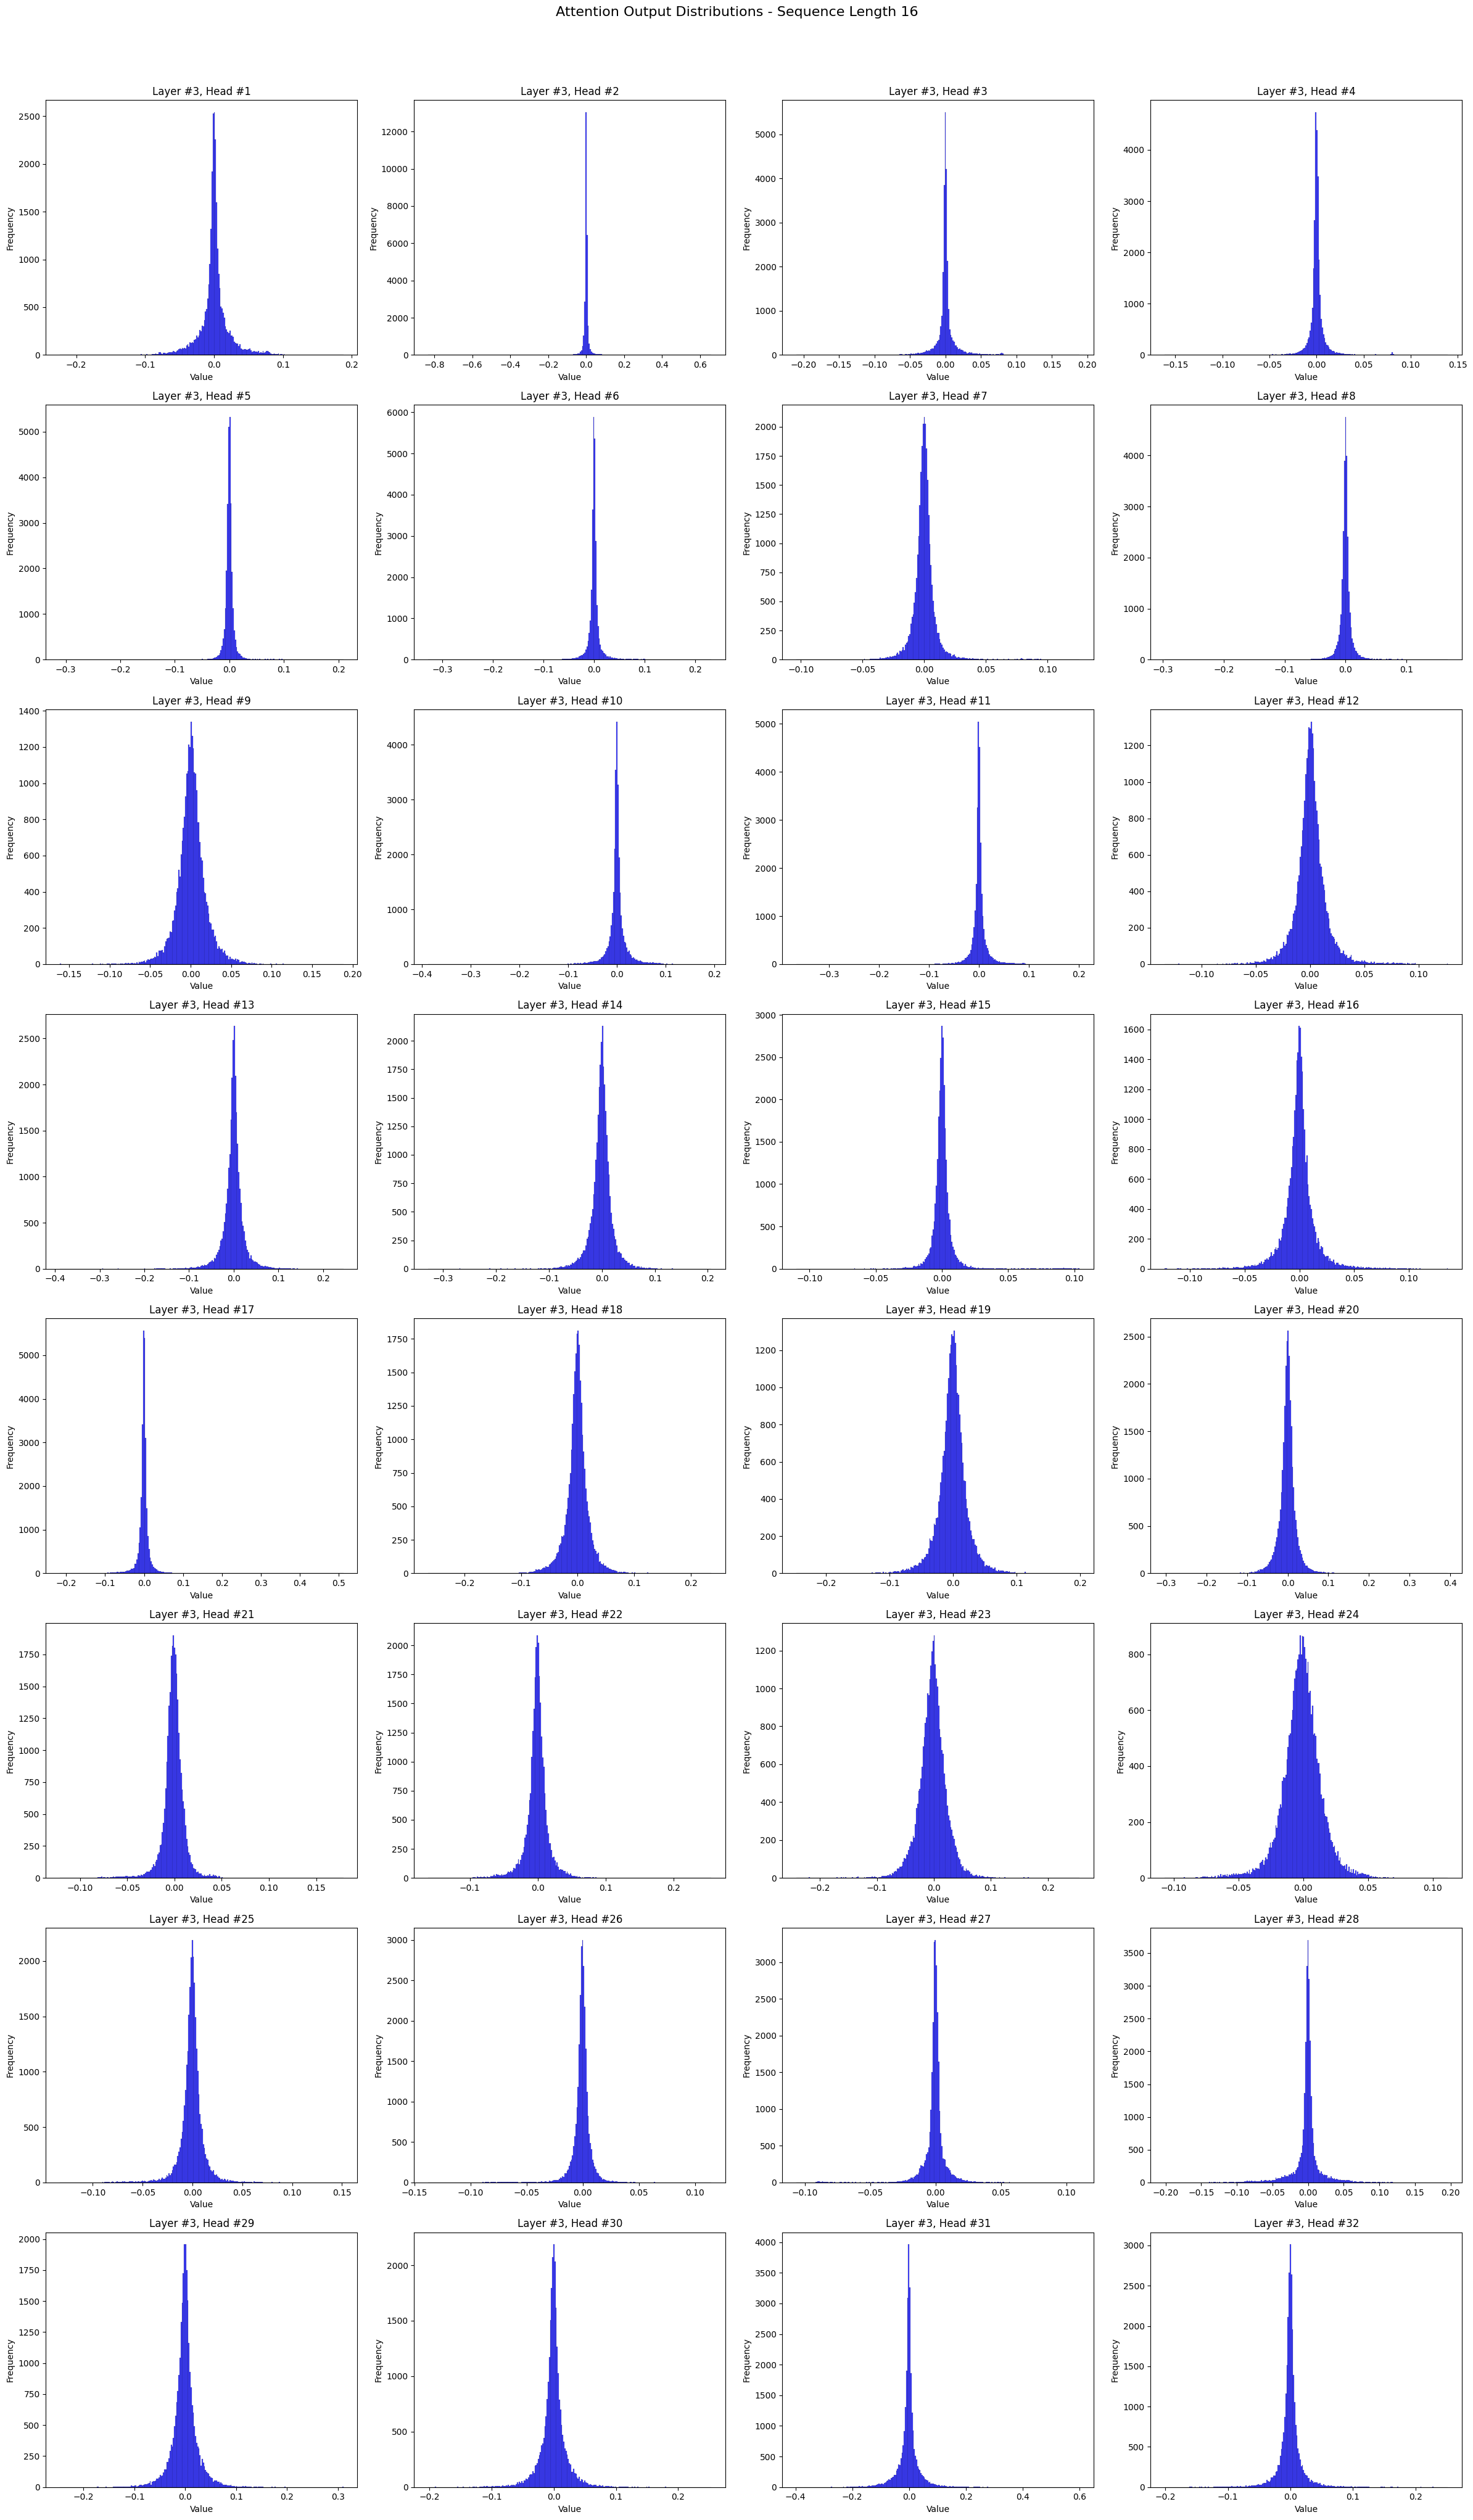

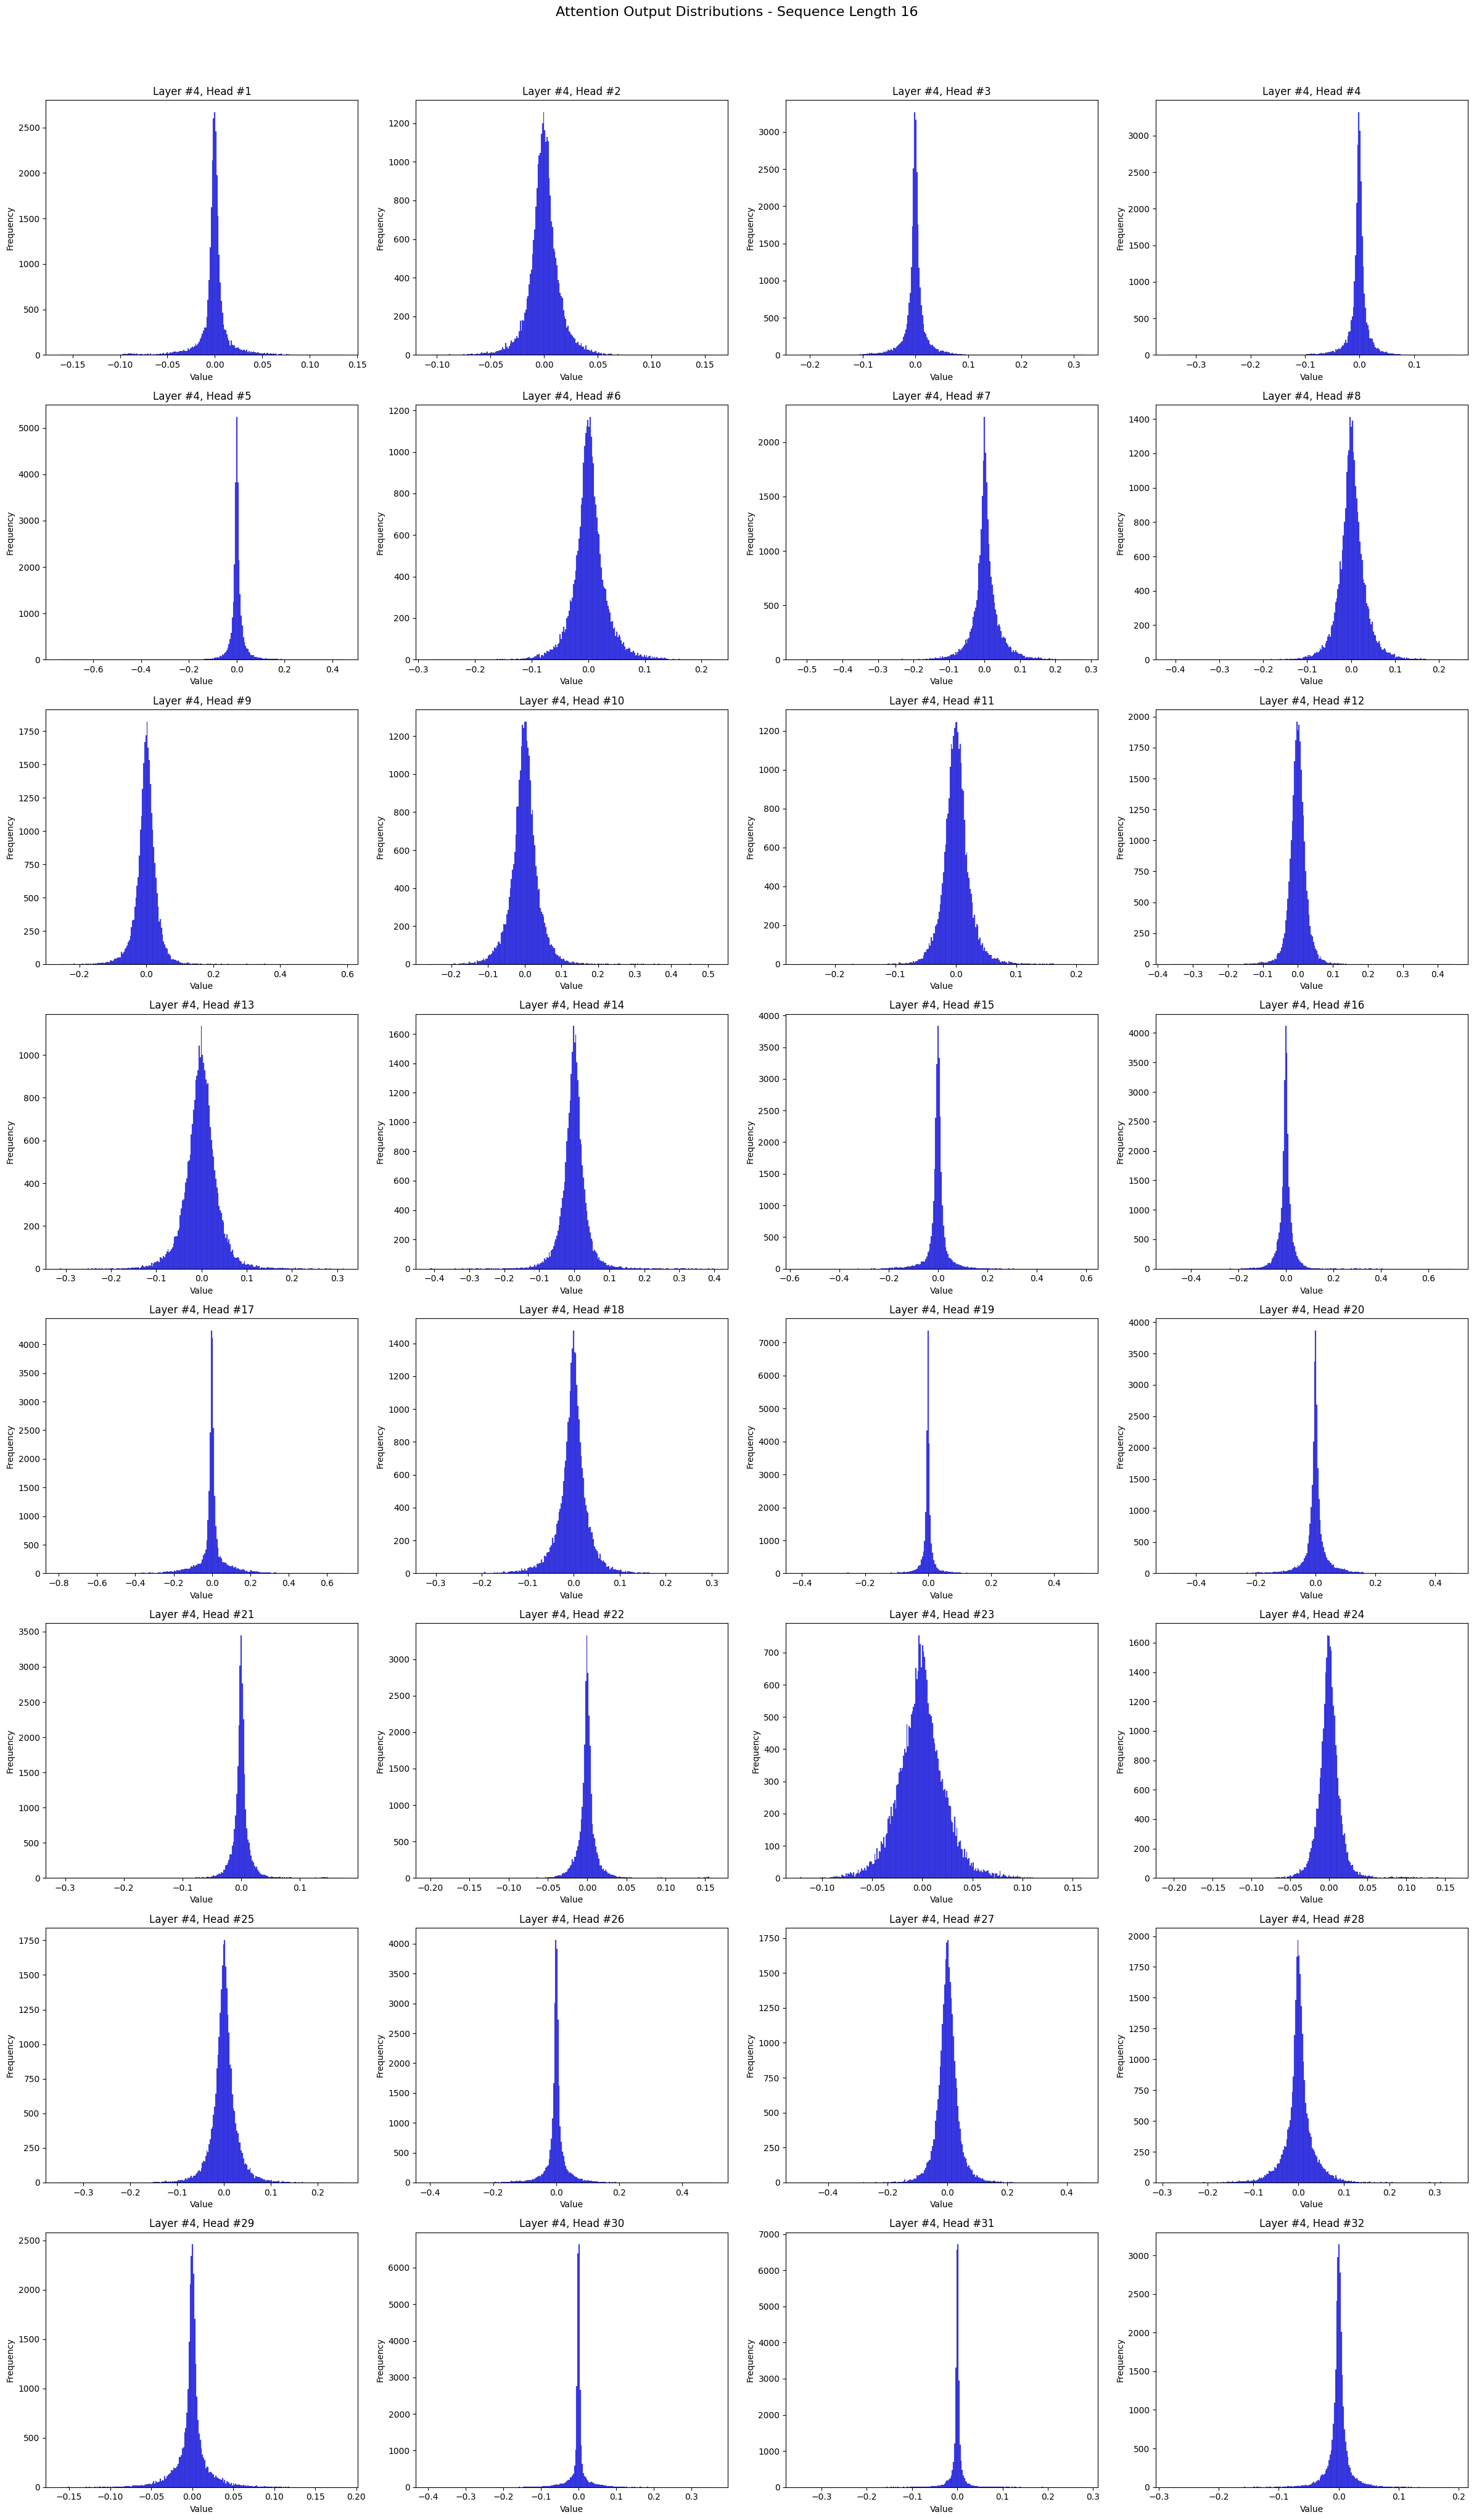

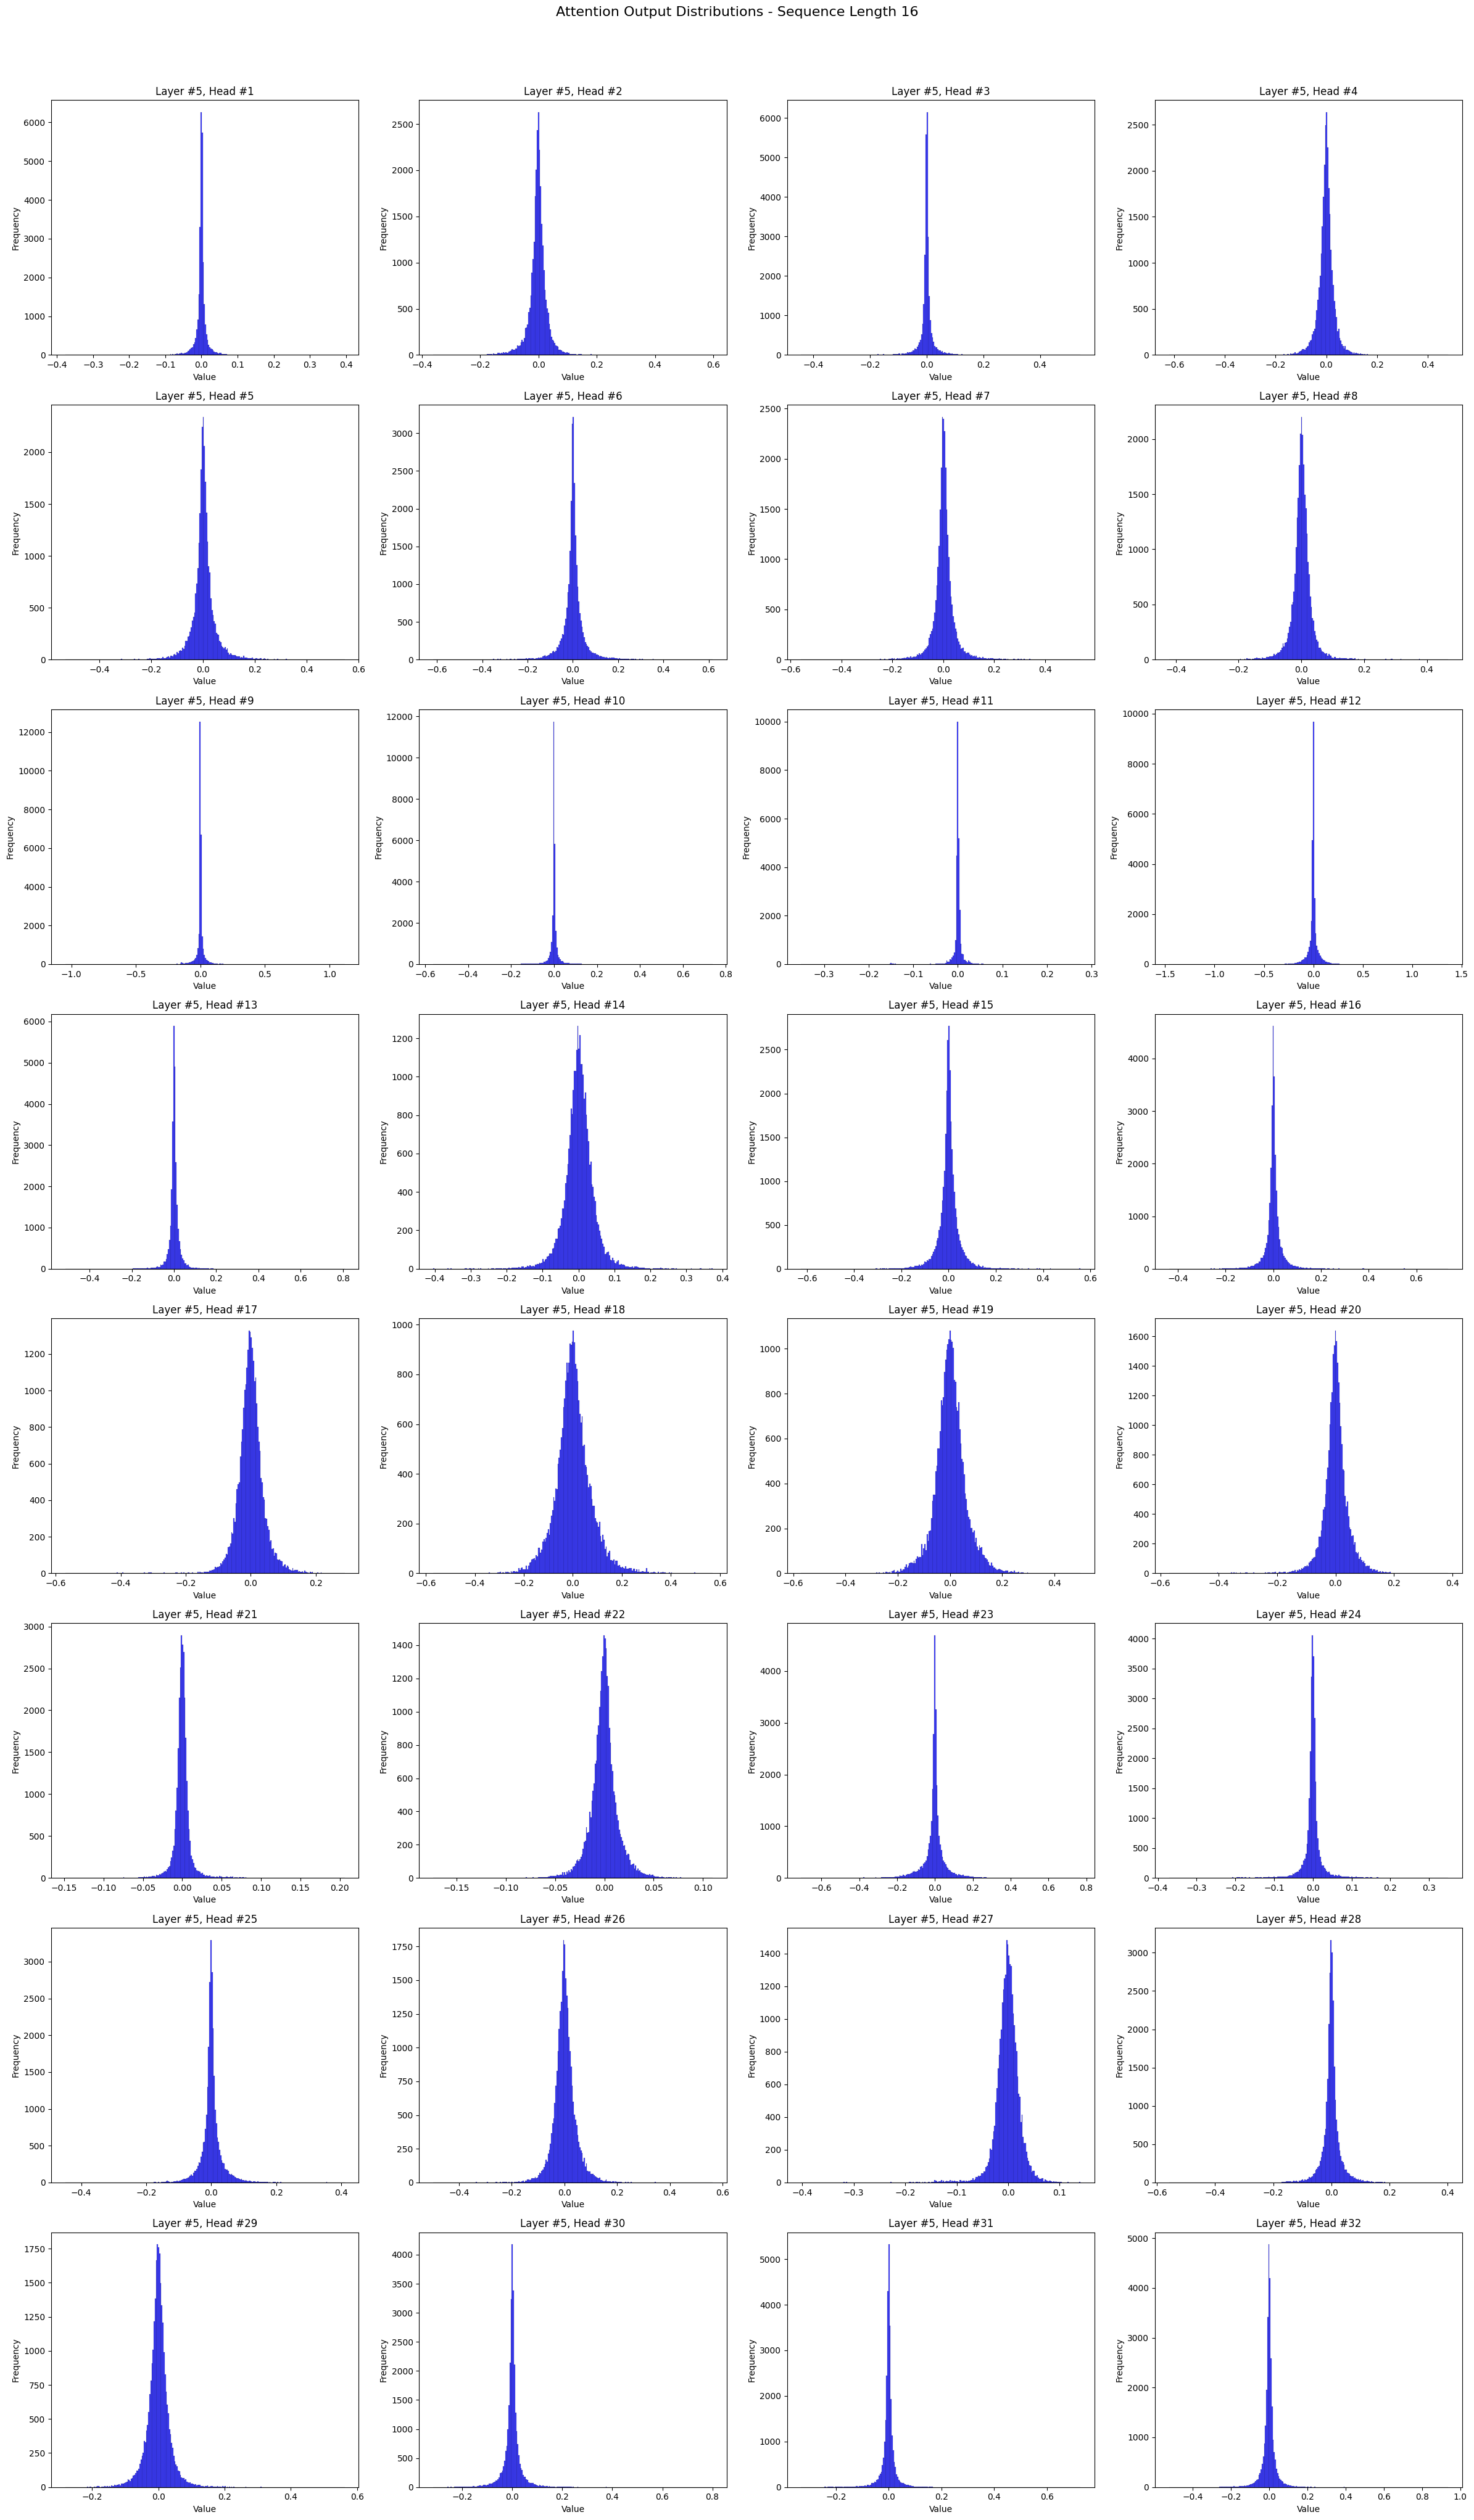

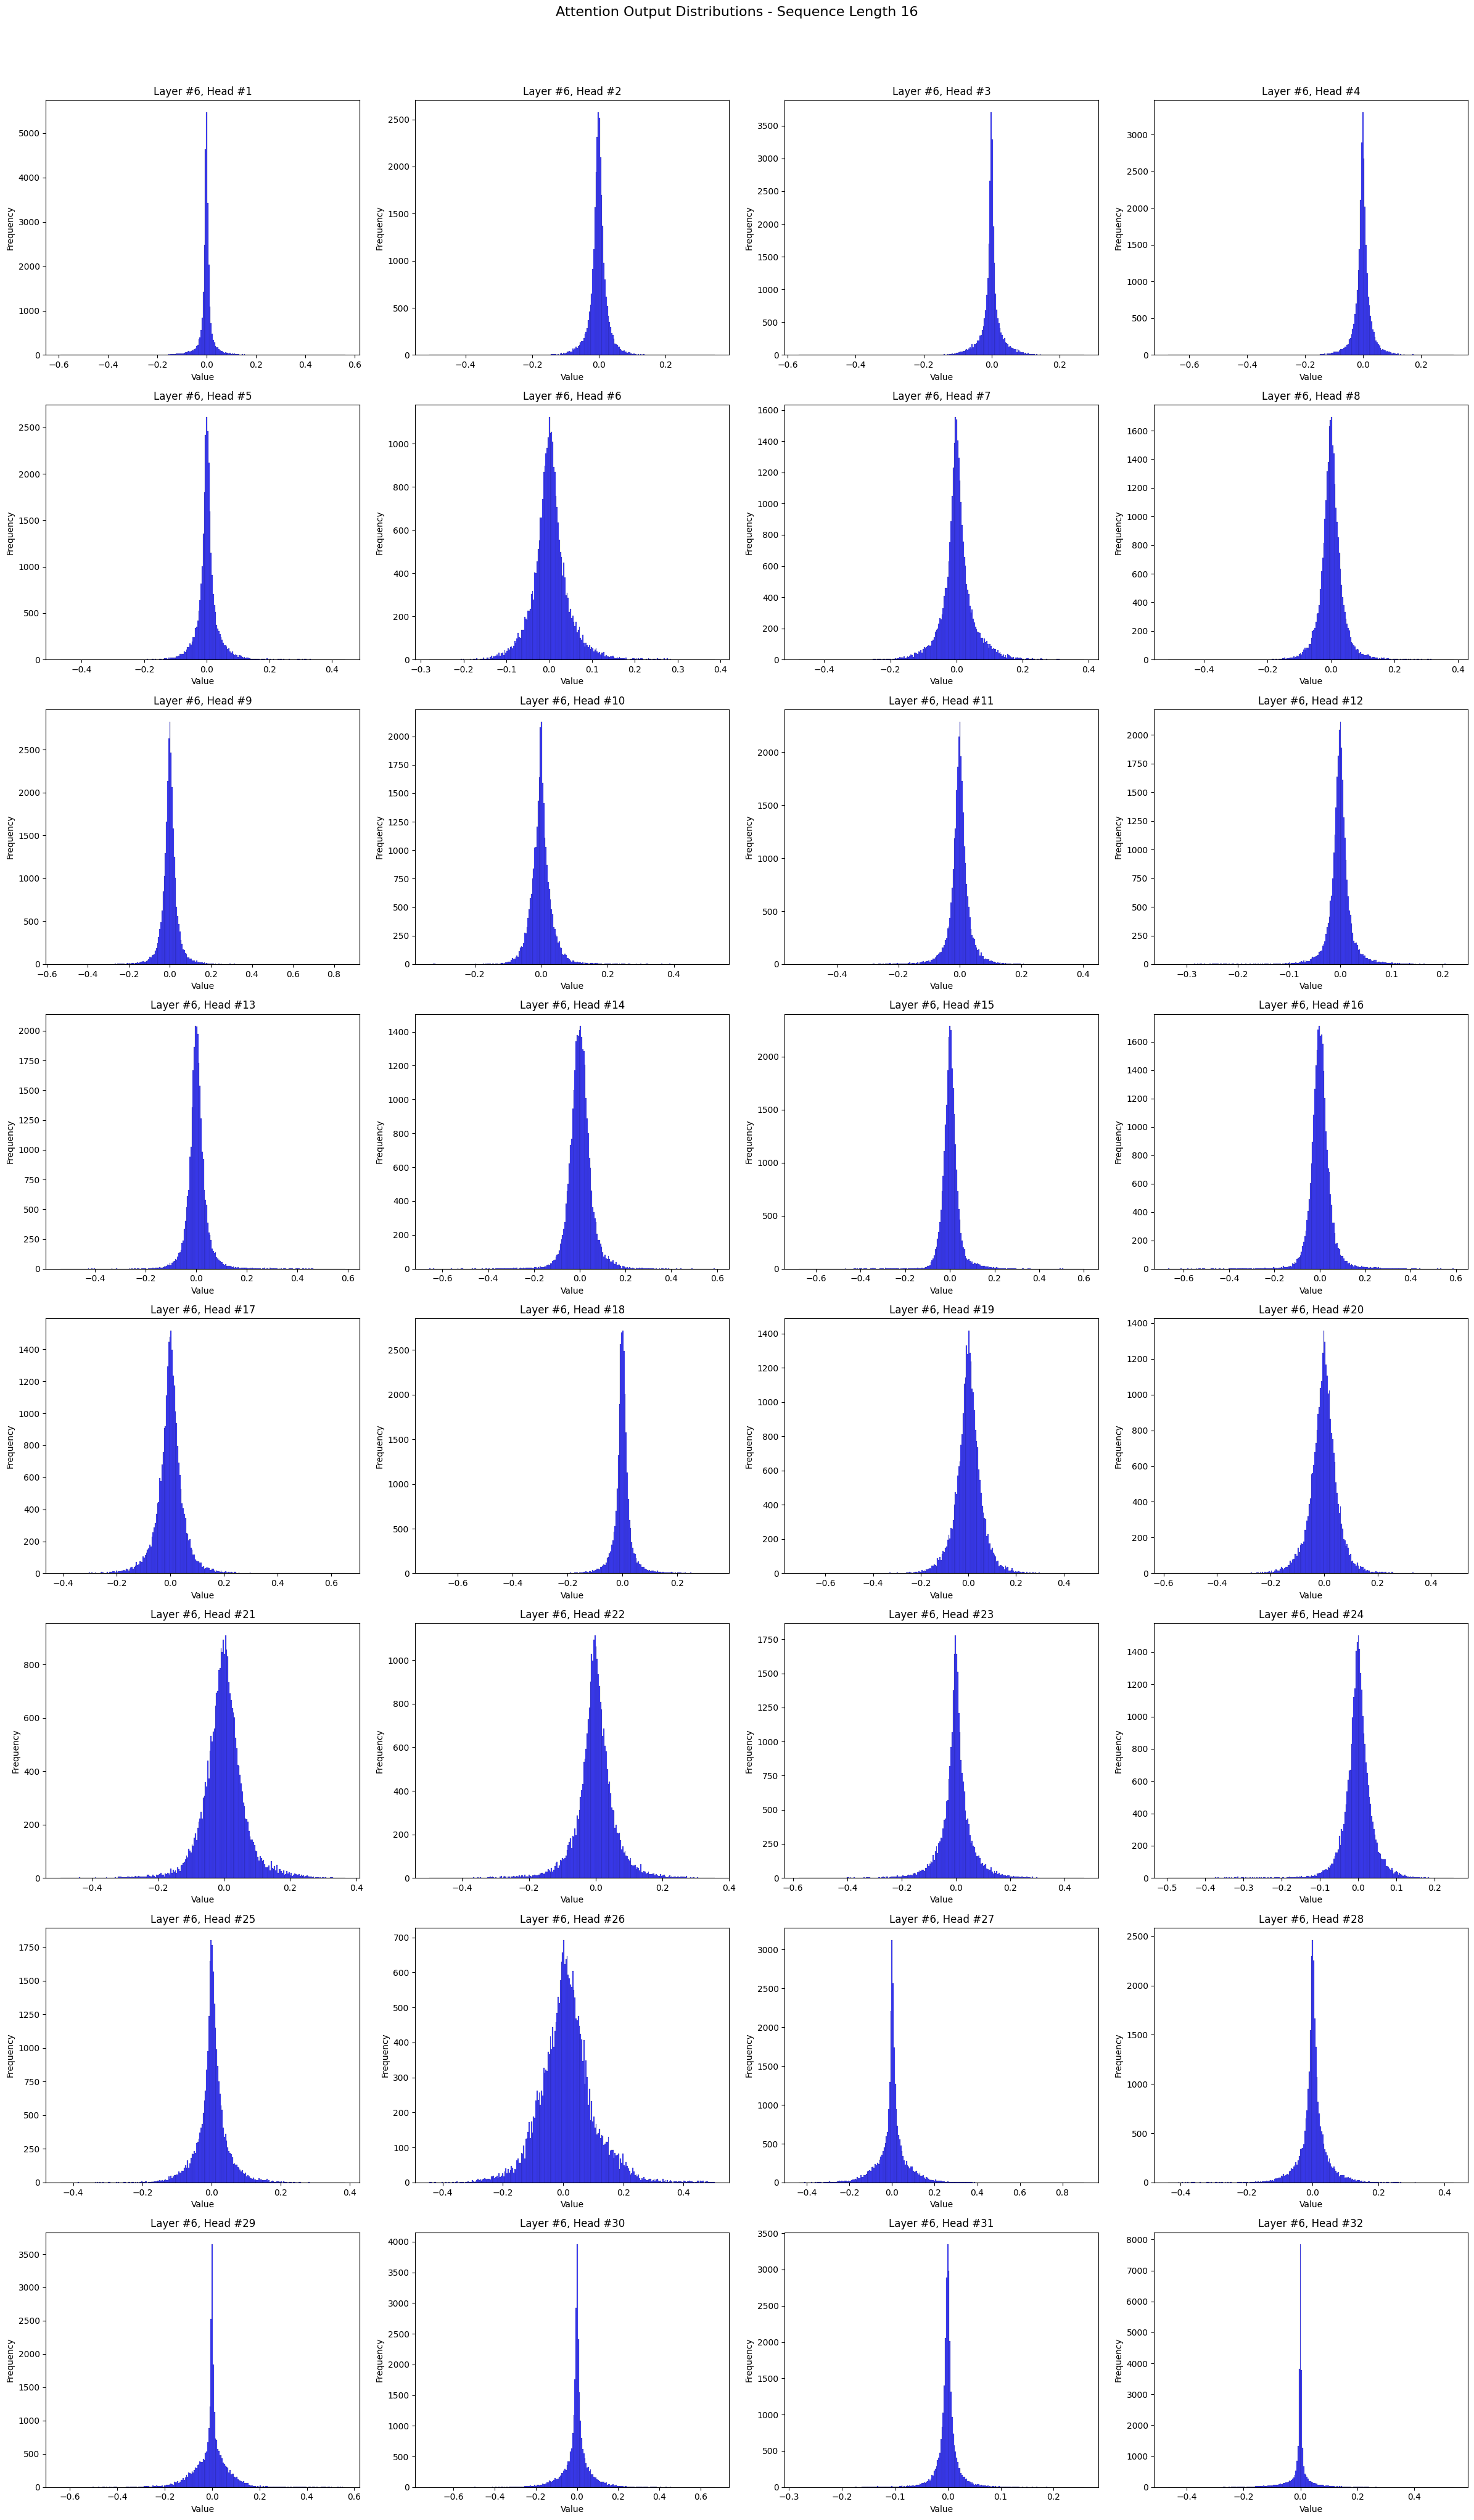

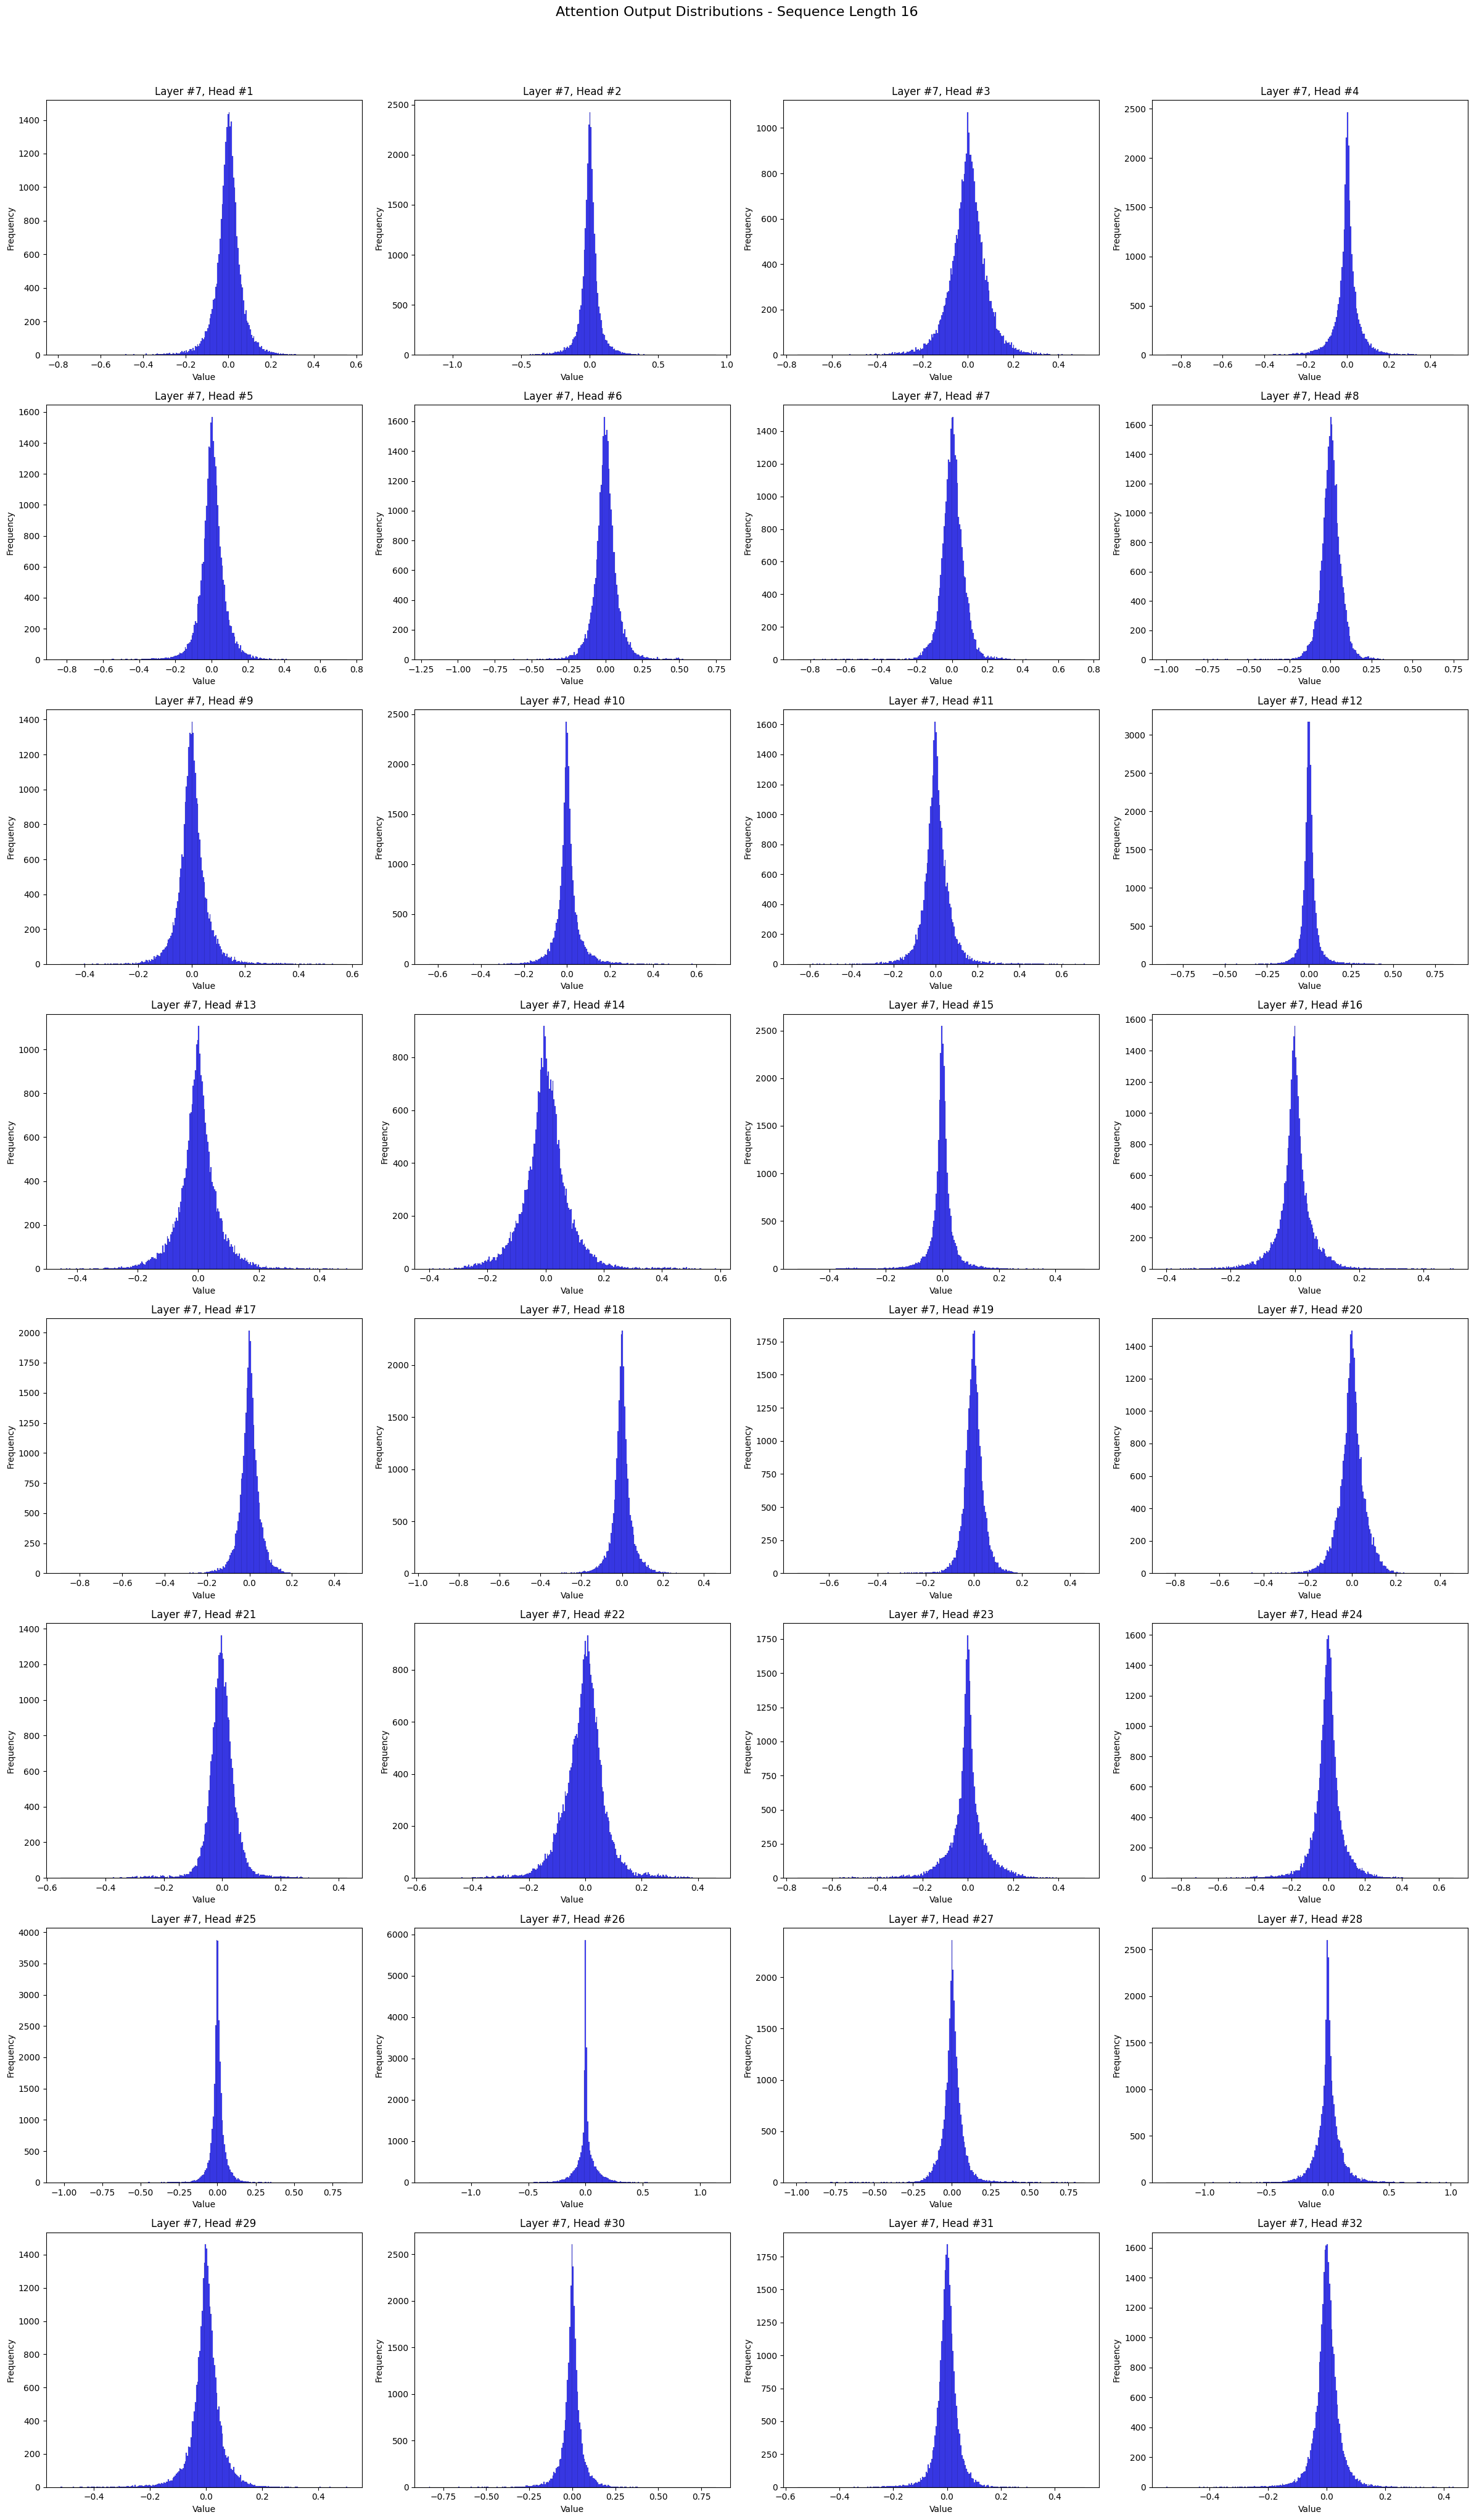

In [ ]:
for seq_length, attn_per_layer in attn_per_seq_length.items():
  for (layer_idx, attn) in enumerate(attn_per_layer):
    visualize_attn_output(
      attn.attention_output[0].float(), # [batch dim out]
      max_sequence_length=seq_length,
      layer_idx=layer_idx,
      bins=256
    )